In [1]:
import numpy as np
import pandas as pd;
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Hypothesis Testing for Dropout/Graduate Students

> #### The objective here is to determine whether our observed differences between dropout students and those who graduated or are still enrolled are statistically significant

##### Setup

In [2]:
# loading data - dataframe from Leena_EDA 
df1 = pd.read_csv('Leena_df1Clean.csv')

# creating dataframe with relative frequencies for each target 
df1_grad = df1[df1['Target'] == 'Graduate/Enrolled']
df1_drop = df1[df1['Target'] == 'Dropout']

##### Storing relative frequencies for desired features (adopted from Leena_EDA)

In [3]:
    #marital_status
marital_status = pd.crosstab(df1['Target'], df1['Marital Status'])
marital_status_relfreq_drop = marital_status.loc['Dropout'] / df1_drop.shape[0]
marital_status_relfreq_grad = marital_status.loc['Graduate/Enrolled'] / df1_grad.shape[0]

    #previous qualification
prev_qual = pd.crosstab(df1['Target'], df1['Previous qualification'])
prev_qual_relfreq_drop = prev_qual.loc['Dropout'] / df1_drop.shape[0]
prev_qual_relfreq_grad = prev_qual.loc['Graduate/Enrolled'] / df1_grad.shape[0]

    #isDisplaced
displaced = pd.crosstab(df1['Target'], df1['isDisplaced'])
displaced_relfreq_drop = displaced.loc['Dropout'] / df1_drop.shape[0]
displaced_relfreq_grad = displaced.loc['Graduate/Enrolled'] / df1_grad.shape[0]

    #hasScholarship
hasScholarship = pd.crosstab(df1['Target'], df1['hasScholarship'])
hasScholarship_relfreq_drop = hasScholarship.loc['Dropout'] / df1_drop.shape[0]
hasScholarship_relfreq_grad = hasScholarship.loc['Graduate/Enrolled'] / df1_grad.shape[0]

    #isDebtor
isDebtor = pd.crosstab(df1['Target'], df1['isDebtor'])
isDebtor_relfreq_drop = isDebtor.loc['Dropout'] / df1_drop.shape[0]
isDebtor_relfreq_grad = isDebtor.loc['Graduate/Enrolled'] / df1_grad.shape[0]

In [4]:
df1.head()

,Marital Status,Course,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Gender,...,Inflation rate,GDP,Target,isDisplaced,hasSpecialNeeds,tuitionToDate,hasScholarship,isDebtor,AttendanceTime,Nationality
0,Single,Animation and Multimedia Design,Secondary,122.0,Basic,Basic,5,9,127.3,Male,...,1.4,1.74,Dropout,True,False,True,False,False,Day,Portuguese
1,Single,Tourism,Secondary,160.0,Secondary,Higher,3,3,142.5,Male,...,-0.3,0.79,Graduate/Enrolled,True,False,False,False,False,Day,Portuguese
2,Single,Communication Design,Secondary,122.0,Basic,Basic,9,9,124.8,Male,...,1.4,1.74,Dropout,True,False,False,False,False,Day,Portuguese
3,Single,Journalism and Communication,Secondary,122.0,Basic,Basic,5,3,119.6,Female,...,-0.8,-3.12,Graduate/Enrolled,True,False,True,False,False,Day,Portuguese
4,Married,Social Service (evening attendance),Secondary,100.0,Basic,Basic,9,9,141.5,Female,...,-0.3,0.79,Graduate/Enrolled,False,False,True,False,False,Evening,Portuguese


## Methodology

First, we will assume that dropout students graduate students both follow a **normal distribution**

For each question, we ran a **2 sample proportion test** with 2 different methods:
1. Performing permutation test using simulation: here we generated difference of proportions to calculated the p-value. 
2. Using the `statsmodels` module to generate p-value. 

## Marital Status

> #### Were more dropout students married (or once married) than students who graduated?

Let $\theta$ = The difference between the proportion of married/divorced dropout students with graduated/enrolled students

$H_0$: $\theta = 0$
> _The distribution of dropout and graduated students came from the same distribution, so any difference is due to chance._

$H_a$: $\theta > 0$
> _The difference could not have occured from chance alone, and the students came from a different population._

In [5]:
# calculating sample statistic 
sample_stat = (marital_status_relfreq_drop['Divorced'] + marital_status_relfreq_drop['Married']) - (marital_status_relfreq_grad['Divorced'] + marital_status_relfreq_grad['Married'])
sample_stat

0.07260719575990511

##### Running the simulation

In [6]:
def marital_diff_in_prop(shuffled_df):
    freq_table = pd.crosstab(shuffled_df['Shuffled'], shuffled_df['Marital Status'])
    
    drop_rel_freq = freq_table.loc['Dropout'] / df1_drop.shape[0]
    grad_rel_freq = freq_table.loc['Graduate/Enrolled'] / df1_grad.shape[0]

    drop_prop = drop_rel_freq['Married'] + drop_rel_freq['Divorced']
    grad_prop = grad_rel_freq['Married'] + grad_rel_freq['Divorced']

    return (drop_prop - grad_prop)

In [7]:
marital_df = df1[['Marital Status', 'Target']]
simulated_diffs = np.array([])
n = 500

for i in range(n):
    shuffled_target = np.random.permutation(marital_df.get('Target'))
    with_shuffled = marital_df.assign(Shuffled=shuffled_target)
    stat = marital_diff_in_prop(with_shuffled)
    simulated_diffs = np.append(simulated_diffs, stat)

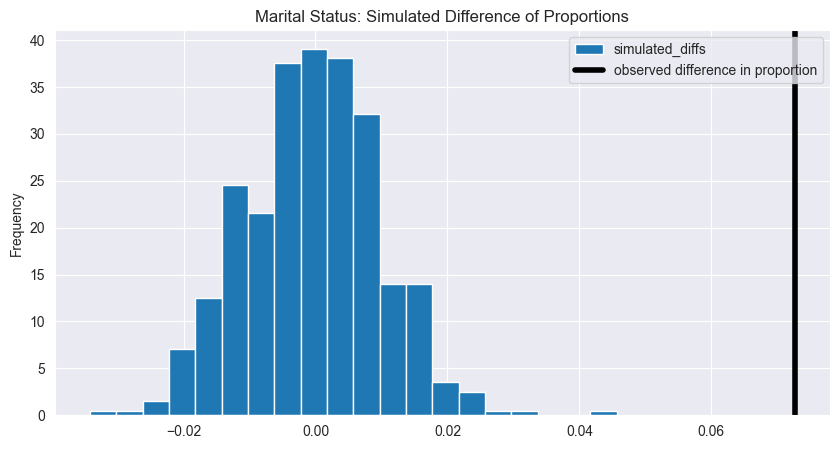

In [8]:
sns.set_style('darkgrid')

(pd.DataFrame()
 .assign(simulated_diffs=simulated_diffs)
 .plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5))
);
plt.axvline(sample_stat, color='black', linewidth=4, label='observed difference in proportion')
plt.title('Marital Status: Simulated Difference of Proportions')
plt.legend();

In [9]:
marital_pval = np.count_nonzero(simulated_diffs >= sample_stat) / n
marital_pval

0.0

In [10]:
marital_status 

Marital Status,Divorced,Facto Union,Legally Separated,Married,Single,Widower
Target,,,,,,
Dropout,42,11,4,179,1184,1
Graduate/Enrolled,49,14,2,200,2735,3


In [11]:
# using statsmodel to perform test 
statsmodels.stats.proportion.proportions_ztest(
    count = [
        df1_drop['Marital Status'].map(lambda x: (x == 'Married') or (x == 'Divorced')).sum() ,
        df1_grad['Marital Status'].map(lambda x: (x == 'Married') or (x == 'Divorced')).sum() 
    ],
    nobs = [
        df1_drop.shape[0],
        df1_grad.shape[0]
    ],
    value = 0.0,
    alternative = 'larger'
)

(7.318038104297261, 1.258112121720764e-13)

## Previous Qualification

> #### Has more dropout students not completed high school as opposed to those who have graduated/are enrolled?
>
> _In other words, do most students dropout after completing high school?_

Let $\theta$ = The difference between the proportion of dropout students who did not complete high school with graduated/enrolled students who did not complete high school.

$H_0$: $\theta = 0$
> _The distribution of dropout and graduated students came from the same distribution, so any difference is due to chance._

$H_a$: $\theta > 0$
> _The difference could not have occured from chance alone, and the students came from a different population._

In [12]:
prev_qual

Previous qualification,Below secondary,Higher,Secondary
Target,,,
Dropout,149,194,1078
Graduate/Enrolled,83,281,2639


In [13]:
#computing observed stat
sample_stat = prev_qual_relfreq_drop['Below secondary'] - prev_qual_relfreq_grad['Below secondary'] 
sample_stat

0.07721670775857967

#### Running Simulation (Permutation Testing)

In [14]:
def prev_qual_diff_in_prop(shuffled_df):
    freq_table = pd.crosstab(shuffled_df['Shuffled'], shuffled_df['Previous qualification'])
    
    drop_rel_freq = freq_table.loc['Dropout'] / df1_drop.shape[0]
    grad_rel_freq = freq_table.loc['Graduate/Enrolled'] / df1_grad.shape[0]

    drop_prop = drop_rel_freq['Below secondary'] 
    grad_prop = grad_rel_freq['Below secondary'] 
    
    return (drop_prop - grad_prop)

In [15]:
prev_qual_df = df1[['Target', 'Previous qualification']]
n = 500
simulated_diffs = np.array([])

for i in range(n):
    shuffled_target = np.random.permutation(prev_qual_df.get('Target'))
    with_shuffled = prev_qual_df.assign(Shuffled=shuffled_target)
    stat = prev_qual_diff_in_prop(with_shuffled)
    simulated_diffs = np.append(simulated_diffs, stat)

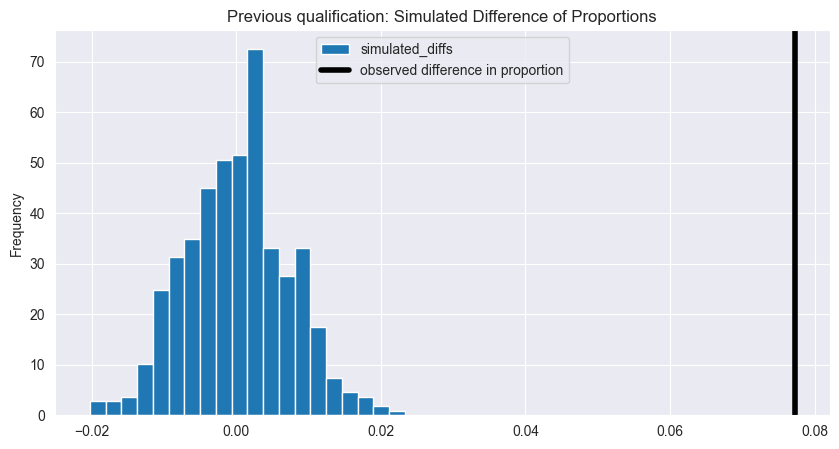

In [16]:
(pd.DataFrame()
 .assign(simulated_diffs=simulated_diffs)
 .plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5))
);
plt.axvline(sample_stat, color='black', linewidth=4, label='observed difference in proportion')
plt.title('Previous qualification: Simulated Difference of Proportions')
plt.legend();

In [17]:
prev_qual_pval = np.count_nonzero(simulated_diffs >= sample_stat) / n
prev_qual_pval

0.0

In [18]:
# using statsmodels to perform test 
statsmodels.stats.proportion.proportions_ztest(
    count = [
        df1_drop['Previous qualification'].map(lambda x: (x == 'Below secondary')).sum(),
        df1_grad['Previous qualification'].map(lambda x: (x == 'Below secondary')).sum() 
    ],
    nobs = [
        df1_drop.shape[0],
        df1_grad.shape[0]
    ],
    value = 0.0,
    alternative = 'larger'
)

(10.758182708244705, 2.7114504223121325e-27)

#### Similarly, has more dropout students obtained their bachelor's (or equivalent) and above as opposed to those who have graduated/are enrolled?

In [19]:
sample_stat = prev_qual_relfreq_drop['Higher'] - prev_qual_relfreq_grad['Higher']
sample_stat

0.04295048137412669

In [20]:
statsmodels.stats.proportion.proportions_ztest(
    count = [
        df1_drop['Previous qualification'].map(lambda x: (x == 'Higher')).sum(),
        df1_grad['Previous qualification'].map(lambda x: (x == 'Higher')).sum() 
    ],
    nobs = [
        df1_drop.shape[0],
        df1_grad.shape[0]
    ],
    value = 0.0,
    alternative = 'larger'
)

(4.308835638534717, 8.205813594316448e-06)

## Binary Data 

In [21]:
def diff_prop(shuffled_df, col):
    """
    Given shuffled column named 'Shuffled' of the target, returns difference between proportion
    of dropout students with gradeuate/enrolled students for desired column
    """
    freq_table = pd.crosstab(shuffled_df['Shuffled'], shuffled_df[col])
    
    drop_rel_freq = freq_table.loc['Dropout'] / df1_drop.shape[0]
    grad_rel_freq = freq_table.loc['Graduate/Enrolled'] / df1_grad.shape[0]

    drop_prop = drop_rel_freq[True]
    grad_prop = grad_rel_freq[True]

    return (drop_prop - grad_prop)

## Displace

> #### Do graduate/enrolled students have a larger proportion of displaced students compared to dropout students?

Let $\theta$ = The difference between the proportion of dropout students who were displaced with graduated/enrolled students who did not complete high school.

$H_0$: $\theta = 0$
> _The distribution of dropout and graduated students came from the same distribution, so any difference is due to chance._

$H_a$: $\theta < 0$
> _The difference could not have occured from chance alone._

#### Running Simulation (Permutation Test)

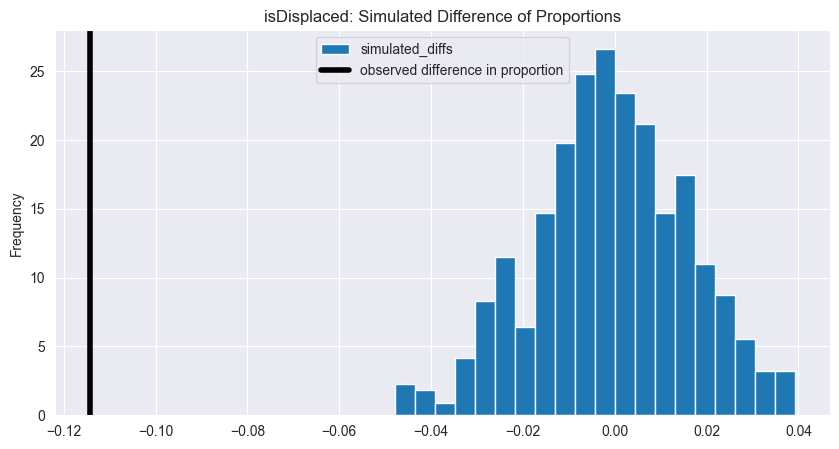

In [22]:
displaced_df = df1[['Target','isDisplaced']]
n = 500 
simulated_diffs = np.array([])

sample_stat = displaced_relfreq_drop[True] - displaced_relfreq_grad[True]

for i in range(n):
    shuffled_target = np.random.permutation(displaced_df['Target'])
    with_shuffled = displaced_df.assign(Shuffled=shuffled_target)
    stat = diff_prop(with_shuffled, 'isDisplaced') 
    simulated_diffs = np.append(simulated_diffs, stat)

# plotting simulated diffs and observed stat
(pd.DataFrame()
 .assign(simulated_diffs=simulated_diffs)
 .plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5))
);
plt.axvline(sample_stat, color='black', linewidth=4, label='observed difference in proportion')
plt.title('isDisplaced: Simulated Difference of Proportions')
plt.legend();

In [23]:
isDisplaced_pval = np.count_nonzero(simulated_diffs <= sample_stat) / n
isDisplaced_pval

0.0

In [24]:
# using statsmodel to perform test 
statsmodels.stats.proportion.proportions_ztest(
    count = [
        df1_drop['isDisplaced'].map(lambda x: (x == True)).sum(),
        df1_grad['isDisplaced'].map(lambda x: (x == True)).sum() 
    ],
    nobs = [
        df1_drop.shape[0],
        df1_grad.shape[0]
    ],
    value = 0.0,
    alternative = 'smaller'
)

(-7.132365069915034, 4.932938815203346e-13)

## hasScholarship
> #### Do dropout students have a smaller proportion of scholarship recipients compared to graduated/enrolled students?

Let $\theta$ = The difference between the proportion of dropout students who had a scholarship with graduated/enrolled students who had a scholarship. 

$H_0$: $\theta = 0$
> _The distribution of dropout and graduated students came from the same distribution, so any difference is due to chance._

$H_a$: $\theta < 0$
> _The difference could not have occured from chance alone._

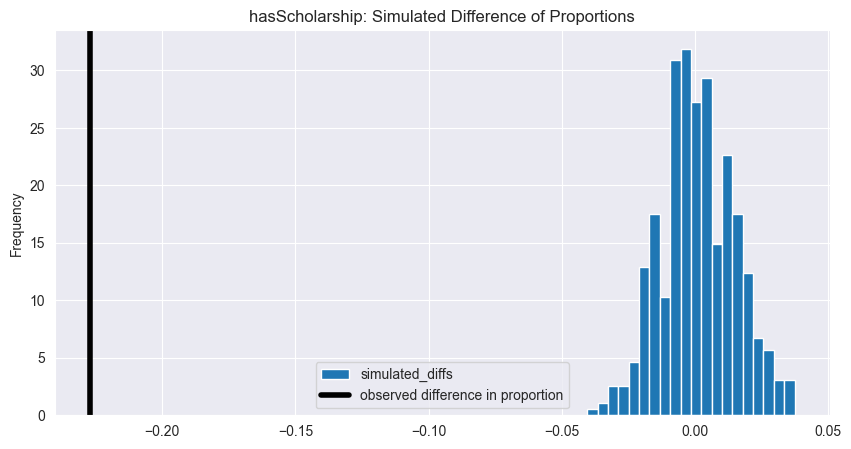

In [25]:
hasScholarship_df = df1[['Target','hasScholarship']]
n = 500 
simulated_diffs = np.array([])

sample_stat = hasScholarship_relfreq_drop[True] - hasScholarship_relfreq_grad[True] 

for i in range(n):
    shuffled_target = np.random.permutation(hasScholarship_df['Target']) 
    with_shuffled = hasScholarship_df.assign(Shuffled=shuffled_target) 
    stat = diff_prop(with_shuffled, 'hasScholarship') 
    simulated_diffs = np.append(simulated_diffs, stat) 

# plotting simulated diffs
(pd.DataFrame()
 .assign(simulated_diffs=simulated_diffs)
 .plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5))
);
plt.axvline(sample_stat, color='black', linewidth=4, label='observed difference in proportion')
plt.title('hasScholarship: Simulated Difference of Proportions')
plt.legend();

In [26]:
# calculate p-val 
hasScholarship_pval = np.count_nonzero(simulated_diffs <= sample_stat) / n
hasScholarship_pval

0.0

In [27]:
# using statsmodels to perform test 
statsmodels.stats.proportion.proportions_ztest(
    count = [
        df1_drop['hasScholarship'].map(lambda x: (x == True)).sum(),
        df1_grad['hasScholarship'].map(lambda x: (x == True)).sum() 
    ],
    nobs = [
        df1_drop.shape[0],
        df1_grad.shape[0]
    ],
    value = 0.0,
    alternative = 'smaller'
)

(-16.319263467057727, 3.599951894765692e-60)

## Debtors 
> #### Do dropout students have a larger proportion of debtors compared to graduate/enrolled students?

Let $\theta$ = The difference between the proportion of dropout students who are debtors with graduated/enrolled debtors. 

$H_0$: $\theta = 0$
> _The distribution of dropout and graduated students came from the same distribution, so any difference is due to chance._

$H_a$: $\theta > 0$
> _The difference could not have occured from chance alone._

#### Running Simulation (Permutation test)

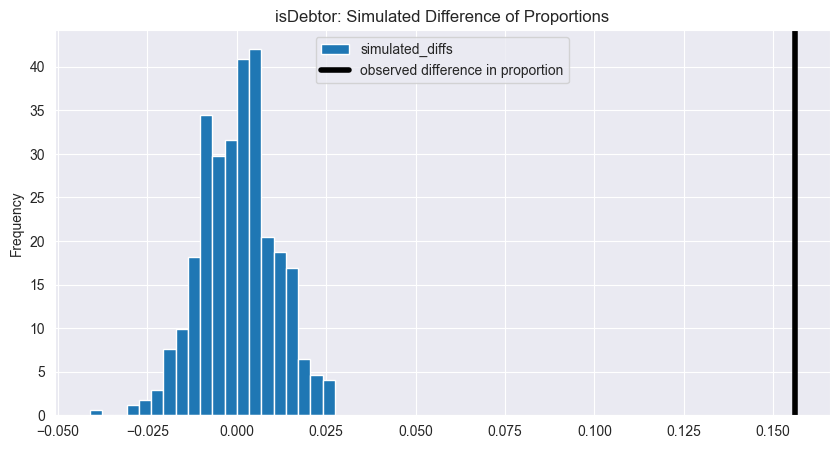

In [28]:
isDebtor_df = df1[['Target','isDebtor']]
n = 500
simulated_diffs = np.array([])

sample_stat = isDebtor_relfreq_drop[True] - isDebtor_relfreq_grad[True]

for i in range(n):
    shuffled_target = np.random.permutation(isDebtor_df['Target']) 
    with_shuffled = isDebtor_df.assign(Shuffled=shuffled_target)
    stat = diff_prop(with_shuffled, 'isDebtor') 
    simulated_diffs = np.append(simulated_diffs, stat) 

# plotting simulated diffs
(pd.DataFrame()
 .assign(simulated_diffs=simulated_diffs)
 .plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5))
);
plt.axvline(sample_stat, color='black', linewidth=4, label='observed difference in proportion')
plt.title('isDebtor: Simulated Difference of Proportions')
plt.legend();

In [29]:
# calculating p-val 
isDebtor_pval = np.count_nonzero(simulated_diffs >= sample_stat) / n
isDebtor_pval

0.0

In [30]:
# using statsmodels to perform test 
statsmodels.stats.proportion.proportions_ztest(
    count = [
        df1_drop['isDebtor'].map(lambda x: (x == True)).sum(),
        df1_grad['isDebtor'].map(lambda x: (x == True)).sum() 
    ],
    nobs = [
        df1_drop.shape[0],
        df1_grad.shape[0]
    ],
    value = 0.0,
    alternative = 'larger'
)

(15.258604435495931, 7.215079900102946e-53)

## Student Academic Path: Enrolled Courses

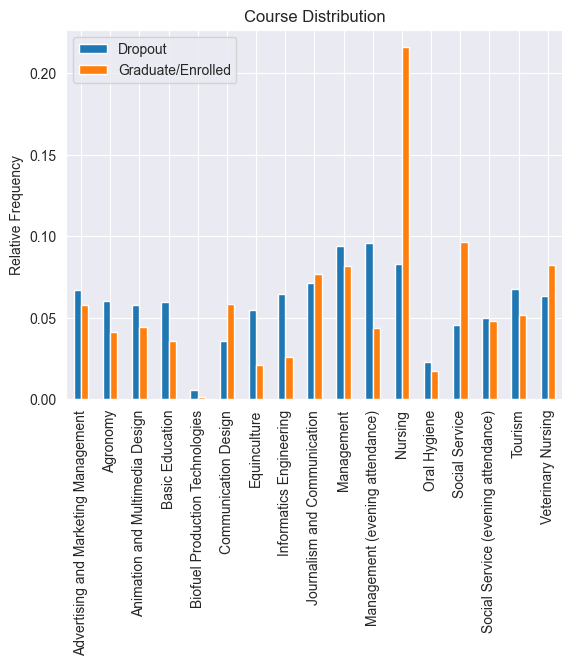

In [31]:
# df of relative frequencies
course_freq = pd.crosstab(df1['Target'], df1['Course'])

course_relfreq = pd.crosstab(df1['Target'], df1['Course'])
course_relfreq.loc['Dropout'] = (course_relfreq.loc['Dropout'] / df1_drop.shape[0])
course_relfreq.loc['Graduate/Enrolled'] = (course_relfreq.loc['Graduate/Enrolled'] / df1_grad.shape[0])

# creating df with relative frequencies of each target (to plot)
index = [col for col in course_relfreq.columns]
dropouts = course_relfreq.loc['Dropout'].values
grads = course_relfreq.loc['Graduate/Enrolled'].values

plot_course_relfreq = pd.DataFrame({'Dropout': dropouts, 'Graduate/Enrolled': grads}, index=index)

# plot
plot_course_relfreq.plot(kind='bar')
plt.ylabel('Relative Frequency')
plt.title('Course Distribution')
plt.show()

In [32]:
course_freq

Course,Advertising and Marketing Management,Agronomy,Animation and Multimedia Design,Basic Education,Biofuel Production Technologies,Communication Design,Equinculture,Informatics Engineering,Journalism and Communication,Management,Management (evening attendance),Nursing,Oral Hygiene,Social Service,Social Service (evening attendance),Tourism,Veterinary Nursing
Target,,,,,,,,,,,,,,,,,
Dropout,95,86,82,85,8,51,78,92,101,134,136,118,33,65,71,96,90
Graduate/Enrolled,173,124,133,107,4,175,63,78,230,246,132,648,53,290,144,156,247


In [33]:
# using statsmodels to perform test 
def course_two_prop_ztest(course, alternative):
    
    return (statsmodels.stats.proportion.proportions_ztest(
    count = [
        course_freq[course].loc['Dropout'],
        course_freq[course].loc['Graduate/Enrolled'] 
    ],
    nobs = [
        df1_drop.shape[0],
        df1_grad.shape[0]
    ],
    value = 0.0,
    alternative = alternative
    )
           )

> #### Were more dropout students enrolled in Equinculture, Informatics Engineering, and Management (evening attendance)?

Let $\theta$ = The difference between the proportion of dropout students who were enrolled in courses in question with graduated/enrolled debtors. 

$H_0$: $\theta = 0$
> _The distribution of dropout and graduated students came from the same distribution, so any difference is due to chance._

$H_a$: $\theta > 0$
> _The difference could not have occured from chance alone._

In [34]:
courses = ['Equinculture', 'Informatics Engineering', 'Management (evening attendance)']
for course in courses:
    print(course)
    print('P-value: ' + str(course_two_prop_ztest(course, 'larger')[1]))
    print('\n')

Equinculture
P-value: 1.012115096367663e-09


Informatics Engineering
P-value: 1.8773131210977776e-10


Management (evening attendance)
P-value: 8.05779486213093e-12




> Since the P-values for all courses are small, we reject the null hypothesis. Thus, we have sufficient evidence to conclude that a larger proportion of dropout students were enrolled in Equinculture, Informatics Engineering, and Management (evening attendance).

> #### Were less dropout students enrolled in Nursing, Social Service, and Communication Design?

Let $\theta$ = The difference between the proportion of dropout students who were enrolled in courses in question with graduated/enrolled debtors. 

$H_0$: $\theta = 0$
> _The distribution of dropout and graduated students came from the same distribution, so any difference is due to chance._

$H_a$: $\theta < 0$
> _The difference could not have occured from chance alone._

In [35]:
courses = ['Nursing', 'Social Service', 'Communication Design']
for course in courses:
    print(course)
    print('P-Value: ' + str(course_two_prop_ztest(course, 'smaller')[1]))
    print('\n')

Nursing
P-Value: 6.031490242155022e-28


Social Service
P-Value: 3.1116227467884122e-09


Communication Design
P-Value: 0.0007952947288784664




> All of the P-values are sufficiently small, so we reject the null hypothesis for all courses. Therefore, it could be said at a smaller proportion of dropout students were enrolled in nursing, social service, and communication design.
>
> Conversely, it could be said that a **larger proportion** of **graduate/enrolled** students were enrolled in **Nursing, Social Service,** and **Communication Design**.

# Conclusion + Key Takeaways

All of our hypothesis tests **rejects the null**, suggesting 
1. A larger proportion dropout students were married or were once married.
2. A larger proportion dropout students did not complete high school (that is, students tend to drop out before completing high school).
3. A larger proportion of graduate/enrolled students were displaced. 
4. A larger proportion of graduate/enrolled students were scholarship recipients.
5. A larger proportion of dropout students were debtors.
6. More dropout students were enrolled in Equinculture, Informatics Engineering, and Management.
7. More graduate/enrolled students were enrolled in Nursing, Social Service, and Communication Design.